<a href="https://colab.research.google.com/github/ma850419/Flexible_Net/blob/main/Wheat_U_Net_V1_9June2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
#from test_utils import summary, comparator
#from test_utils import  summary

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
!unzip /content/gdrive/MyDrive/dataset_wheat/Source_png.zip

Archive:  /content/gdrive/MyDrive/dataset_wheat/Source_png.zip
  inflating: Label_png/mask_tile_0_0_0_2017.png  
  inflating: Label_png/mask_tile_0_0_0_2018-05-16.png  
  inflating: Label_png/mask_tile_0_0_0_2018-05-21.png  
  inflating: Label_png/mask_tile_0_0_0_2018-06-10.png  
  inflating: Label_png/mask_tile_0_0_0_2018-06-15.png  
  inflating: Label_png/mask_tile_0_0_0_2018-5-11.png  
  inflating: Label_png/mask_tile_0_0_0_2018-6-25.png  
  inflating: Label_png/mask_tile_0_0_0_2019-05-11.png  
  inflating: Label_png/mask_tile_0_0_0_2019-06-10.png  
  inflating: Label_png/mask_tile_0_0_0_2019-06-25.png  
  inflating: Label_png/mask_tile_0_0_0_2020-05-20.png  
  inflating: Label_png/mask_tile_0_1024_2_2017.png  
  inflating: Label_png/mask_tile_0_1024_2_2018-05-16.png  
  inflating: Label_png/mask_tile_0_1024_2_2018-05-21.png  
  inflating: Label_png/mask_tile_0_1024_2_2018-06-10.png  
  inflating: Label_png/mask_tile_0_1024_2_2018-06-15.png  
  inflating: Label_png/mask_tile_0_1024_

In [ ]:
#!pip freeze
import os
file_path = comparator.__file__
dir = os.path.dirname(file_path)

# printing the directory
print(dir)

In [8]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import imageio

import matplotlib.pyplot as plt
%matplotlib inline
path = ''
image_path = os.path.join(path, '/content/Source_png/')
mask_path = os.path.join(path, '/content/Label_png/')
image_list = os.listdir(image_path)
mask_list = os.listdir(mask_path)
image_list = [image_path+i for i in image_list]
mask_list = [mask_path+i for i in mask_list]

In [ ]:
import os
import osgeo.osr as osr
from PIL import Image
main_path = "C:/samples/"
data_folder = os.path.join(main_path, "Label/")
data_folder_png = os.path.join(main_path, "Label_png/")
from osgeo import gdal
output_types = [gdal.GDT_Byte, gdal.GDT_UInt16, gdal.GDT_Float32]
if not os.path.isdir(data_folder_png):
  os.mkdir(data_folder_png)
for root, dirs, files in os.walk(data_folder, topdown=False):
    new_folder = os.path.join(data_folder_png,os.path.split(root)[1])
    if (not os.path.exists(new_folder)) and files:
      os.mkdir(new_folder)
    for name in files:
        tiffile = os.path.join(root, name)
        print(os.path.join(root, name))
        #if os.path.splitext(os.path.join(root, name))[1].lower() == ".tiff":
        if os.path.splitext(os.path.join(root, name))[1].lower() == ".tif":
            if os.path.isfile(os.path.splitext(os.path.join(new_folder, name))[0] + ".png"):
                print ("A png file already exists for %s" % name)
            # If a jpeg with the name does *NOT* exist, convert one from the tif.
            else:
                outputfile = os.path.splitext(os.path.join(new_folder, name))[0] + ".png"
                try:
                    print ("Converting png for %s" % name)
                    dataset = gdal.Open(tiffile)
                    '''ncols = dataset.RasterXSize
                    nrows= dataset.RasterYSize
                    transform = dataset.GetGeoTransform()
                    target = osr.SpatialReference()
                    target.ImportFromEPSG(32636)
                    driver = gdal.GetDriverByName('MEM')
                    band = dataset.GetRasterBand(1)
                    arr = band.ReadAsArray()
                    print(arr.shape)
                    print(ncols,nrows)
                    outputDataset = driver.Create(outputfile,ncols,nrows, 1,gdal.GDT_UInt16)
                    #outputDataset.SetGeoTransform(transform)
                    outputDataset.SetProjection(target.ExportToWkt())
                    outputDataset.GetRasterBand(1).WriteArray(arr)
                    #outputDataset.GetRasterBand(1).SetNoDataValue(-9999)'''
                    transform = dataset.GetGeoTransform()
                    options = gdal.TranslateOptions(format='PNG', bandList=[1], projWinSRS='EPSG:32636',creationOptions=['WORLDFILE=YES'], outputType=output_types[0])
                    gdal.Translate(outputfile, dataset, options=options)
                    #print(f'Successfully saved png file to {outputfile}')
                    '''outputDataset.FlushCache()
                    arr=None
                    driver = None
                    dataset = None
                    target = None'''
                except Exception as e:
                    print(e)

Text(0.5, 1.0, 'Segmentation')

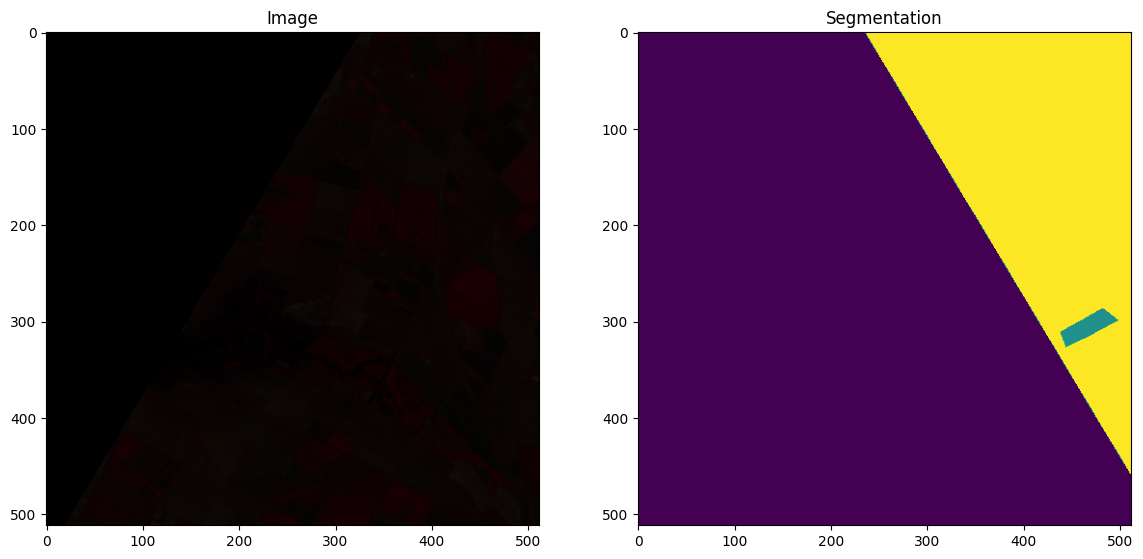

In [9]:
N = 75
img = imageio.v2.imread(image_list[N])
mask = imageio.v2.imread(mask_list[N])
#mask = np.array([max(mask[i, j]) for i in range(mask.shape[0]) for j in range(mask.shape[1])]).reshape(img.shape[0], img.shape[1])

fig, arr = plt.subplots(1, 2, figsize=(14, 10))
arr[0].imshow(img)
arr[0].set_title('Image')
arr[1].imshow(mask[:, :])
arr[1].set_title('Segmentation')

In [ ]:
x_train,  x_test, y_train, y_test = train_test_split(train111,train_labels,random_state=2020,test_size=0.2)

In [10]:
image_list_ds = tf.data.Dataset.list_files(image_list, shuffle=False)
mask_list_ds = tf.data.Dataset.list_files(mask_list, shuffle=False)

for path in zip(image_list_ds.take(3), mask_list_ds.take(3)):
    print(path)

(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/Source_png/tile_0_0_0_2017-06-30.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/content/Label_png/mask_tile_0_0_0_2017.png'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/Source_png/tile_0_0_0_2018-05-11.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/content/Label_png/mask_tile_0_0_0_2018-05-16.png'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/Source_png/tile_0_0_0_2018-05-16.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/content/Label_png/mask_tile_0_0_0_2018-05-21.png'>)


In [11]:
image_filenames = tf.constant(image_list)
masks_filenames = tf.constant(mask_list)
dataset = tf.data.Dataset.from_tensor_slices((image_filenames, masks_filenames))

for image, mask in dataset.take(1):
    print(image)
    print(mask)

tf.Tensor(b'/content/Source_png/tile_512_1024_7_2018-06-15.png', shape=(), dtype=string)
tf.Tensor(b'/content/Label_png/mask_tile_1024_1024_12_2018-05-16.png', shape=(), dtype=string)


In [12]:
def process_path(image_path, mask_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=3)
    mask = tf.math.reduce_max(mask, axis=-1, keepdims=True)
    return img, mask

def preprocess(image, mask):
    input_image = tf.image.resize(image, (512, 512), method='nearest')
    input_mask = tf.image.resize(mask, (512, 512), method='nearest')

    return input_image, input_mask

image_ds = dataset.map(process_path)
processed_image_ds = image_ds.map(preprocess)

In [13]:
# UNQ_C1
# GRADED FUNCTION: conv_block
def conv_block(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
    """
    Convolutional downsampling block

    Arguments:
        inputs -- Input tensor
        n_filters -- Number of filters for the convolutional layers
        dropout_prob -- Dropout probability
        max_pooling -- Use MaxPooling2D to reduce the spatial dimensions of the output volume
    Returns:
        next_layer, skip_connection --  Next layer and skip connection outputs
    """

    ### START CODE HERE
    conv = Conv2D(n_filters, # Number of filters
                  3,   # Kernel size
                  activation='relu',
                  padding='same',
                  kernel_initializer='he_normal')(inputs)
    conv = Conv2D(n_filters, # Number of filters
                  3,   # Kernel size
                  activation='relu',
                  padding='same',
                  kernel_initializer='he_normal')(conv)
    ### END CODE HERE

    # if dropout_prob > 0 add a dropout layer, with the variable dropout_prob as parameter
    if dropout_prob > 0:
         ### START CODE HERE
        conv = Dropout(dropout_prob)(conv)
         ### END CODE HERE


    # if max_pooling is True add a MaxPooling2D with 2x2 pool_size
    if max_pooling:
        ### START CODE HERE
        next_layer = MaxPooling2D(2,strides=2)(conv)
        ### END CODE HERE

    else:
        next_layer = conv

    skip_connection = conv

    return next_layer, skip_connection

In [14]:
input_size=(512, 512, 3)
n_filters = 32
inputs = Input(input_size)
cblock1 = conv_block(inputs, n_filters * 1)
model1 = tf.keras.Model(inputs=inputs, outputs=cblock1)

output1 = [['InputLayer', [(None, 256, 512, 3)], 0],
            ['Conv2D', (None, 256, 512, 32), 896, 'same', 'relu', 'HeNormal'],
            ['Conv2D', (None, 256, 512, 32), 9248, 'same', 'relu', 'HeNormal'],
            ['MaxPooling2D', (None, 64, 128, 32), 0, (2, 2)]]

'''print('Block 1:')
for layer in model1.summary:
    print(layer)

comparator(model1.summary, output1)'''

inputs = Input(input_size)
cblock1 = conv_block(inputs, n_filters * 32, dropout_prob=0.1, max_pooling=True)
model2 = tf.keras.Model(inputs=inputs, outputs=cblock1)

output2 = [['InputLayer', [(None, 256, 512, 3)], 0],
            ['Conv2D', (None, 256, 512, 1024), 28672, 'same', 'relu', 'HeNormal'],
            ['Conv2D', (None, 256, 512, 1024), 9438208, 'same', 'relu', 'HeNormal'],
            ['Dropout', (None, 256, 512, 1024), 0, 0.1],
            ['MaxPooling2D', (None, 64, 128, 1024), 0, (2, 2)]]

'''print('\nBlock 2:')
for layer in summary(model2):
    print(layer)

comparator(summary(model2), output2)'''

"print('\nBlock 2:')   \nfor layer in summary(model2):\n    print(layer)\n    \ncomparator(summary(model2), output2)"

In [15]:
# UNQ_C2
# GRADED FUNCTION: upsampling_block
def upsampling_block(expansive_input, contractive_input, n_filters=32):
    """
    Convolutional upsampling block

    Arguments:
        expansive_input -- Input tensor from previous layer
        contractive_input -- Input tensor from previous skip layer
        n_filters -- Number of filters for the convolutional layers
    Returns:
        conv -- Tensor output
    """

    ### START CODE HERE
    up = Conv2DTranspose(
                 n_filters,    # number of filters
                 3,    # Kernel size
                 strides=2,
                 padding='same')(expansive_input)

    # Merge the previous output and the contractive_input
    merge = concatenate([up, contractive_input], axis=3)
    conv = Conv2D(n_filters,   # Number of filters
                 3,     # Kernel size
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(merge)
    conv = Conv2D(n_filters,   # Number of filters
                 3,     # Kernel size
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(conv)
    ### END CODE HERE

    return conv

In [16]:
input_size1=(12, 16, 256)
input_size2 = (24, 32, 128)
n_filters = 32
expansive_inputs = Input(input_size1)
contractive_inputs =  Input(input_size2)
cblock1 = upsampling_block(expansive_inputs, contractive_inputs, n_filters * 1)
model1 = tf.keras.Model(inputs=[expansive_inputs, contractive_inputs], outputs=cblock1)

output1 = [['InputLayer', [(None, 12, 16, 256)], 0],
            ['Conv2DTranspose', (None, 24, 32, 32), 73760],
            ['InputLayer', [(None, 24, 32, 128)], 0],
            ['Concatenate', (None, 24, 32, 160), 0],
            ['Conv2D', (None, 24, 32, 32), 46112, 'same', 'relu', 'HeNormal'],
            ['Conv2D', (None, 24, 32, 32), 9248, 'same', 'relu', 'HeNormal']]

'''print('Block 1:')
for layer in summary(model1):
    print(layer)

comparator(summary(model1), output1)'''

"print('Block 1:')\nfor layer in summary(model1):\n    print(layer)\n\ncomparator(summary(model1), output1)"

In [17]:
# UNQ_C3
# GRADED FUNCTION: unet_model
def unet_model(input_size=(512, 512, 3), n_filters=32, n_classes=3):
    """
    Unet model

    Arguments:
        input_size -- Input shape
        n_filters -- Number of filters for the convolutional layers
        n_classes -- Number of output classes
    Returns:
        model -- tf.keras.Model
    """
    inputs = Input(input_size)
    # Contracting Path (encoding)
    # Add a conv_block with the inputs of the unet_ model and n_filters
    ### START CODE HERE
    cblock1 = conv_block(inputs=inputs, n_filters=n_filters*1)
    # Chain the first element of the output of each block to be the input of the next conv_block.
    # Double the number of filters at each new step
    cblock2 = conv_block(inputs=cblock1[0], n_filters=n_filters*2)
    cblock3 = conv_block(inputs=cblock2[0], n_filters=n_filters*4)
    cblock4 = conv_block(inputs=cblock3[0], n_filters=n_filters*8,dropout_prob=0.3) # Include a dropout_prob of 0.3 for this layer
    # Include a dropout_prob of 0.3 for this layer, and avoid the max_pooling layer
    cblock5 = conv_block(inputs=cblock4[0], n_filters=n_filters*16,dropout_prob=0.3, max_pooling=False)
    ### END CODE HERE

    # Expanding Path (decoding)
    # Add the first upsampling_block.
    # Use the cblock5[0] as expansive_input and cblock4[1] as contractive_input and n_filters * 8
    ### START CODE HERE
    ublock6 = upsampling_block(cblock5[0], cblock4[1], n_filters*8)
    # Chain the output of the previous block as expansive_input and the corresponding contractive block output.
    # Note that you must use the second element of the contractive block i.e before the maxpooling layer.
    # At each step, use half the number of filters of the previous block
    ublock7 = upsampling_block(ublock6, cblock3[1], n_filters*4)
    ublock8 = upsampling_block(ublock7, cblock2[1], n_filters*2)
    ublock9 = upsampling_block(ublock8, cblock1[1], n_filters*1)
    ### END CODE HERE

    conv9 = Conv2D(n_filters,
                 3,
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(ublock9)

    # Add a Conv2D layer with n_classes filter, kernel size of 1 and a 'same' padding
    ### START CODE HERE
    conv10 = Conv2D(n_classes, 1, padding='same',activation='softmax')(conv9)
    ### END CODE HERE

    model = tf.keras.Model(inputs=inputs, outputs=conv10)

    return model

In [18]:
#import outputs
img_height = 512
img_width = 512
num_channels = 3

unet = unet_model((img_height, img_width, num_channels))
#comparator(summary(unet), outputs.unet_model_output)

In [19]:
unet.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 512, 512, 32)         896       ['input_5[0][0]']             
                                                                                                  
 conv2d_7 (Conv2D)           (None, 512, 512, 32)         9248      ['conv2d_6[0][0]']            
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 256, 256, 32)         0         ['conv2d_7[0][0]']            
 g2D)                                                                                       

In [20]:
unet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)


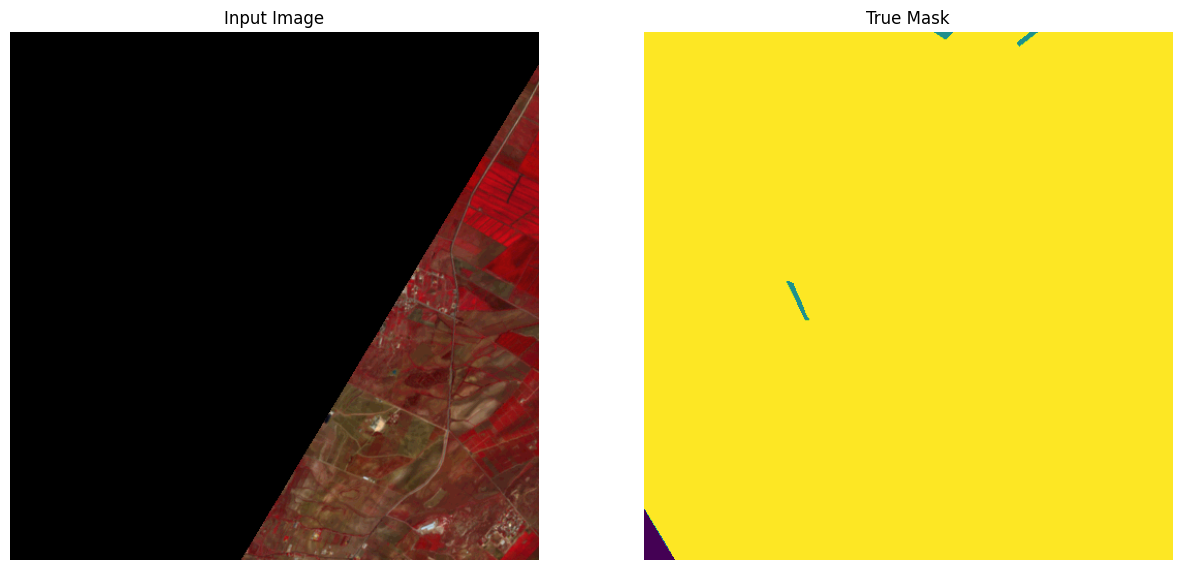

In [22]:
for image, mask in image_ds.take(5):
    sample_image, sample_mask = image, mask
    print(mask.shape)
display([sample_image, sample_mask])

In [25]:
EPOCHS = 5
VAL_SUBSPLITS = 5
BUFFER_SIZE = 250
BATCH_SIZE = 16
train_dataset = processed_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(processed_image_ds.element_spec)
model_history = unet.fit(train_dataset, epochs=EPOCHS)

(TensorSpec(shape=(512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(512, 512, 1), dtype=tf.uint8, name=None))
Epoch 1/5
18/18 [==============================] - 97s 2s/step - loss: 1.1467 - accuracy: 0.5510
Epoch 2/5
18/18 [==============================] - 30s 2s/step - loss: 0.7933 - accuracy: 0.5960
Epoch 3/5
18/18 [==============================] - 29s 2s/step - loss: 0.7091 - accuracy: 0.5410
Epoch 4/5
18/18 [==============================] - 29s 2s/step - loss: 0.7229 - accuracy: 0.5961
Epoch 5/5
18/18 [==============================] - 30s 2s/step - loss: 0.7254 - accuracy: 0.5203


In [26]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

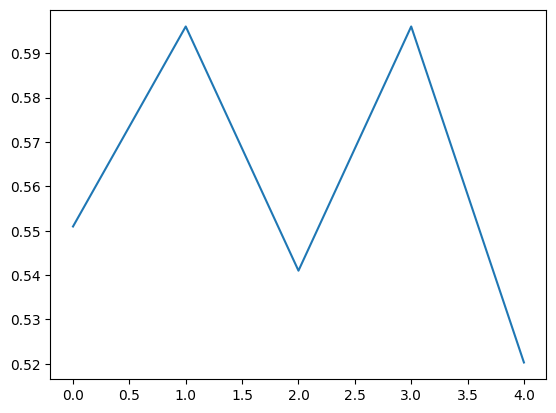

In [27]:
plt.plot(model_history.history["accuracy"])

In [28]:
def show_predictions(dataset=None, num=1):
    """
    Displays the first image of each of the num batches
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = unet.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
             create_mask(unet.predict(sample_image[tf.newaxis, ...]))])

1/1 [==============================] - 1s 979ms/step


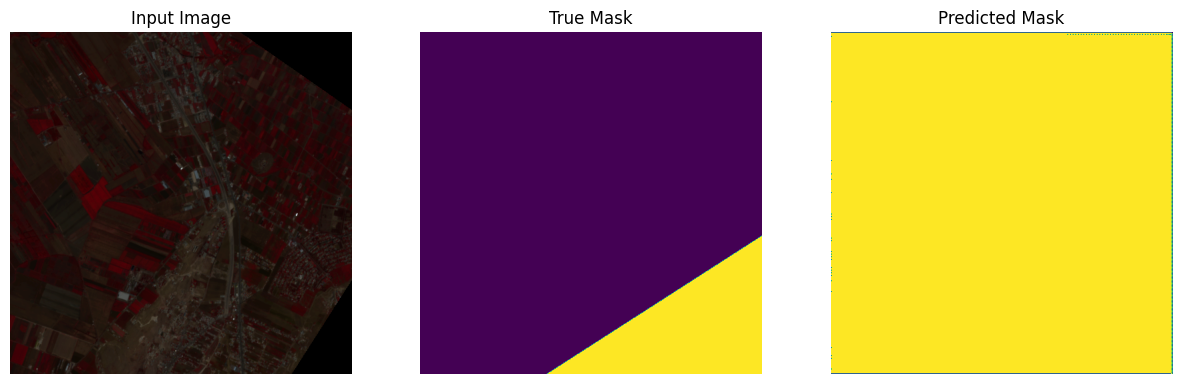

1/1 [==============================] - 0s 65ms/step


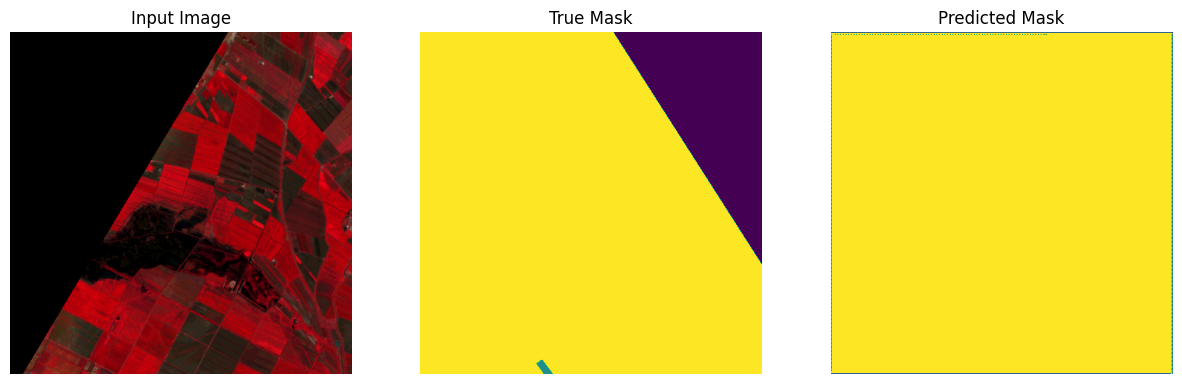

1/1 [==============================] - 0s 89ms/step


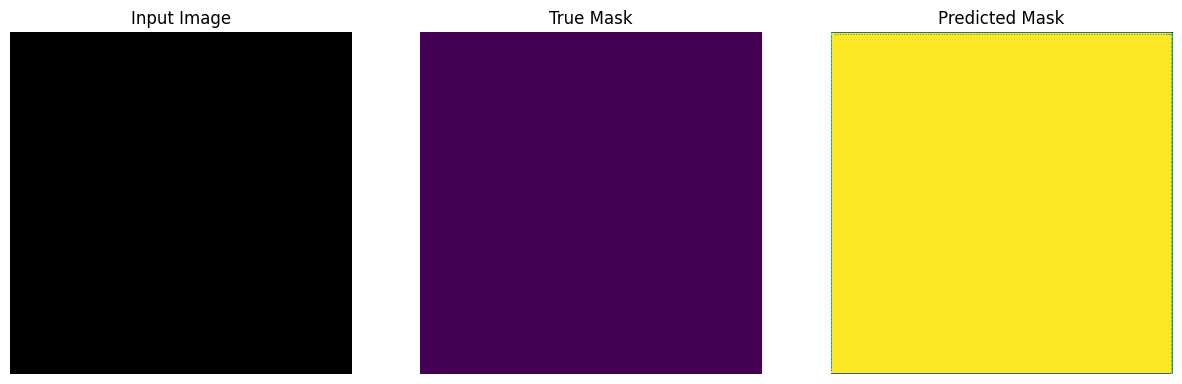

1/1 [==============================] - 0s 83ms/step


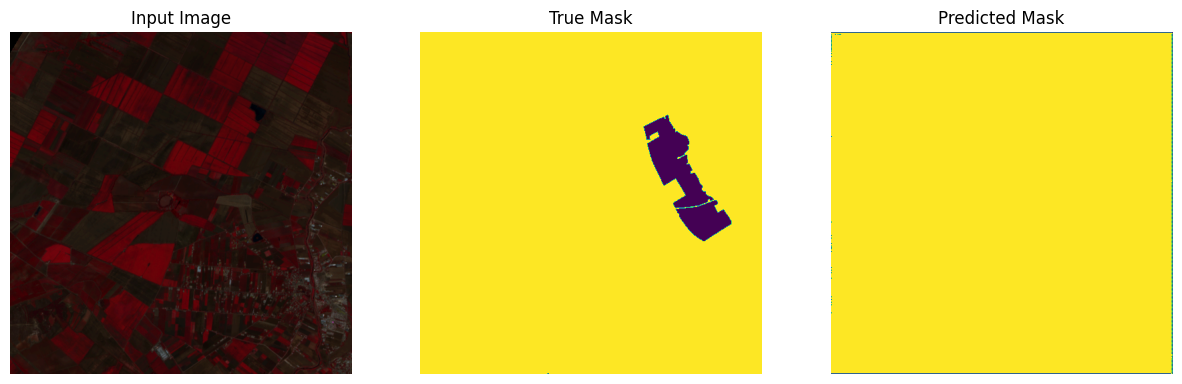

1/1 [==============================] - 0s 90ms/step


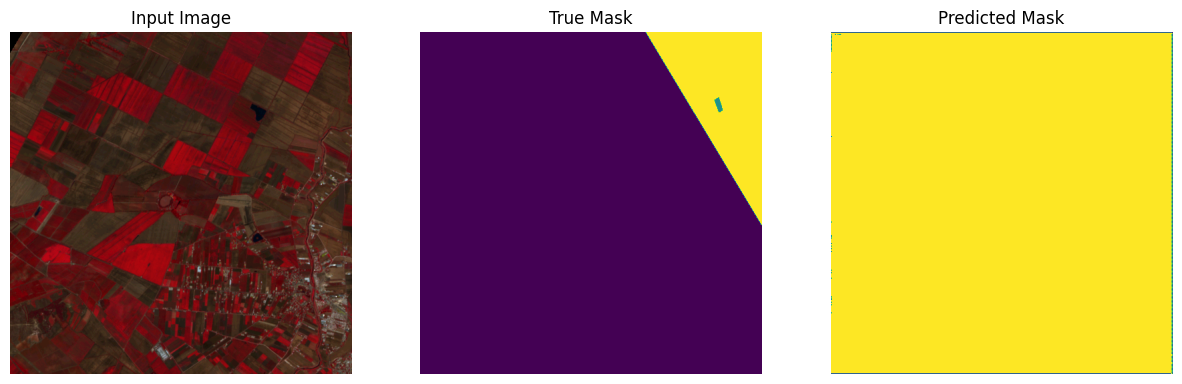

1/1 [==============================] - 0s 117ms/step


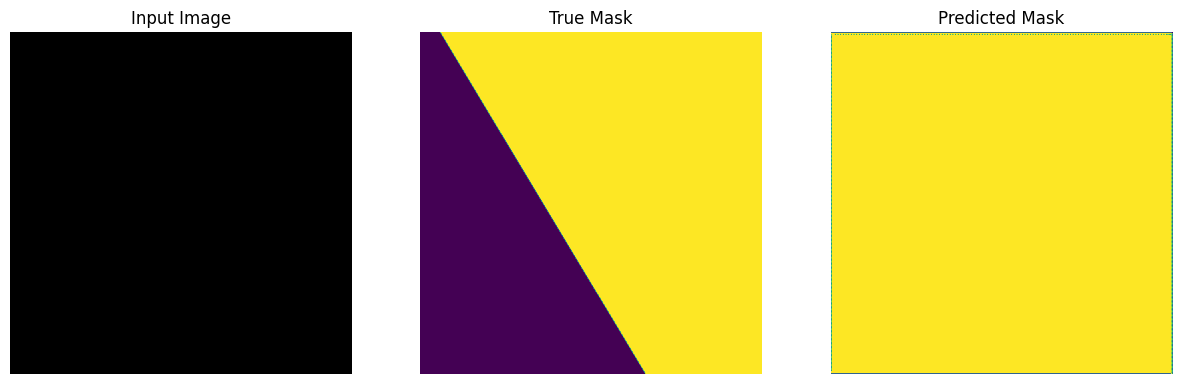

In [29]:

show_predictions(train_dataset, 6)

In [30]:
%%javascript
IPython.notebook.save_checkpoint();
if (confirm("Clear memory?") == true)
{
    IPython.notebook.kernel.restart();
}

<IPython.core.display.Javascript object>